## Data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn .linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import pickle

In [5]:
train_data=pd.read_excel('Data_Train.xlsx')

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Dealing with missing values

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.shape

(10683, 11)

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Cleaning on data to ready data

In [12]:
def  chnagetotime(col):
    train_data[col] = pd.to_datetime(train_data[col])
    

In [13]:
for i in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    chnagetotime(i)

In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month


In [16]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
def extract_hour(df,col):
    # from dep and arrival time
   df[col+'_hour']= df[col].dt.hour

def extract_min(df,col):
    # from dep and arrival time
   df[col+'_minute']= df[col].dt.minute

def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')

drop_col(train_data,'Dep_Time')

In [19]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')

drop_col(train_data,'Arrival_Time')

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
duration=list(train_data['Duration'])

In [22]:
x='2h 50m'
len(x.split(' '))

2

In [23]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        # duration is like 19h or 50m
        if 'h' in duration[i]:
            duration[i]= duration[i] + ' 0m'
        else:
            duration[i]="0h "+duration[i]
            

In [24]:
train_data['Duration']=duration

In [25]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


## Perform Data Preprocessing

In [26]:
'2h 50m'.split(' ')[0:-1]

['2h']

In [27]:
'2h 50m'.split(' ')[1]

'50m'

In [28]:
def hour(x):
    return x.split(' ')[0][0:-1]
    
def minute(x):
    return x.split(' ')[1][0:-1]

In [29]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
drop_col(train_data,'Duration')

In [32]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_mins          object
dtype: object

In [33]:
## change object to datetime
train_data['Duration_hour']=train_data['Duration_hour'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [34]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_mins           int32
dtype: object

In [35]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
count_col=[col for col in train_data.columns if train_data[col].dtype!='O']
count_col
#countinuous features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_mins']

## Handling cat data and feature encoding


In [37]:
## Nominal DATA= Data not in any order .Eg name of country Uses one hot emcoding
## Ordinal DATA= Data in some order/Heirarchy EG- god-better-best Uses LaberEncoder

In [38]:
categorical=train_data[cat_col]

In [39]:
categorical


,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [40]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

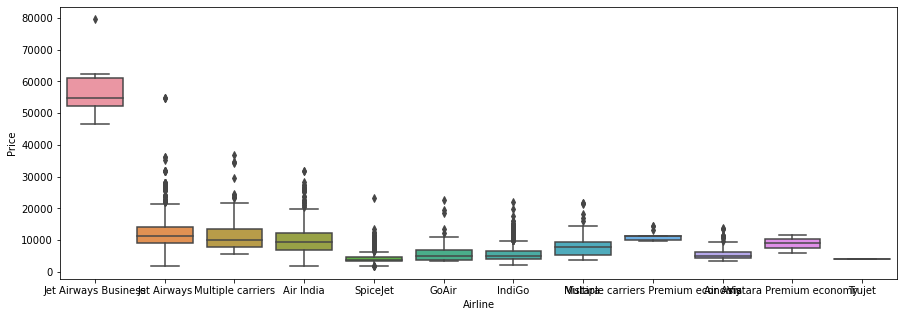

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data.sort_values('Price', ascending=False),x='Airline',y='Price')

## Conclusion
Jet Airways ahs Highest business and rest all as same values

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

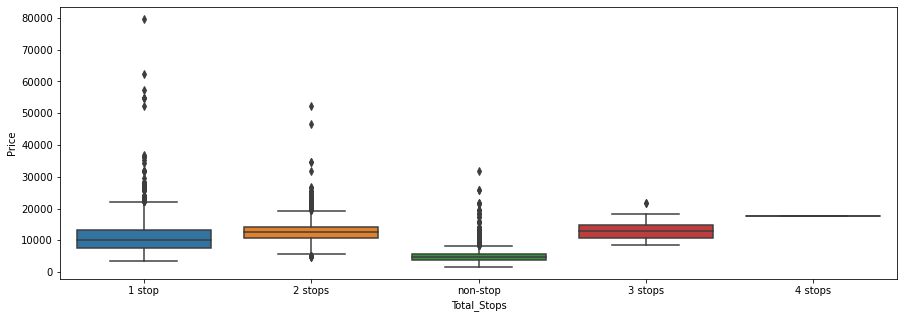

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data.sort_values('Price', ascending=False),x='Total_Stops',y='Price')


## Flights with 1 stop has higher price and filghts with 4 stops has the lowest price

In [43]:
# convert airline to int data

# using one hot encoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)

In [44]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [45]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

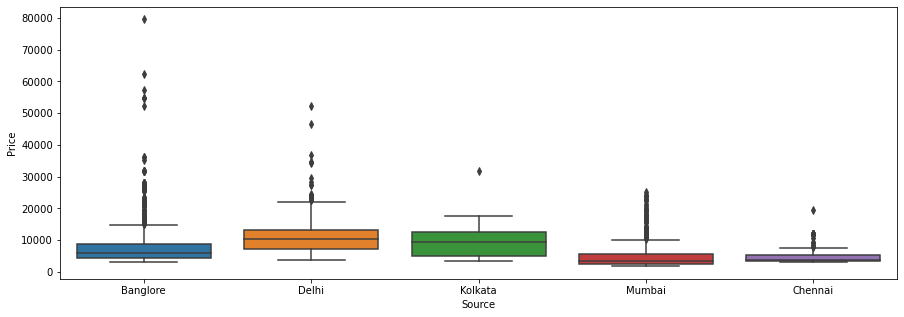

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data.sort_values('Price', ascending=False),x='Source',y='Price')

# Conclusion
Banglore has highest fluctuation in data

Delhi has highest median

In [47]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [48]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [49]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


<AxesSubplot:xlabel='Destination', ylabel='Price'>

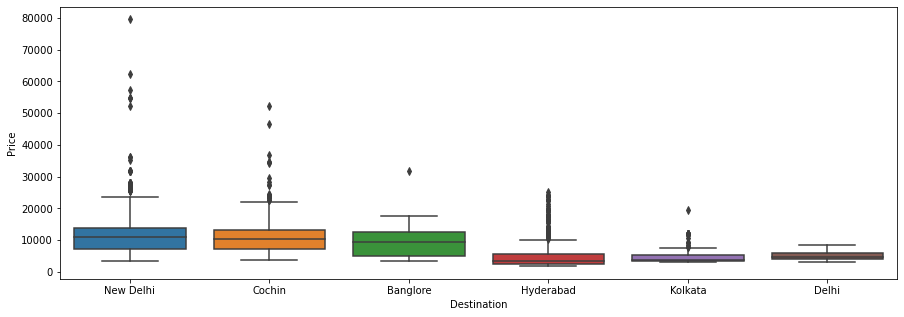

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data.sort_values('Price', ascending=False),x='Destination',y='Price')

In [51]:
## Solving Route column

categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [52]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [53]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [54]:
drop_col(categorical,'Route')

In [55]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [56]:
for i in ['Route_3','Route_4','Route_5' ]:
    categorical[i].fillna('None', inplace=True)

In [57]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [58]:
for i in categorical.columns:
    print('{} has total {} values' .format(i,len(categorical[i].value_counts())))

Airline has total 12 values
Source has total 5 values
Destination has total 6 values
Total_Stops has total 5 values
Additional_Info has total 10 values
Route_1 has total 5 values
Route_2 has total 45 values
Route_3 has total 30 values
Route_4 has total 14 values
Route_5 has total 6 values


In [59]:
# one hot encoding here will create more columns and will create issue thus use LabelEncoder
encoder=LabelEncoder()
categorical.columns


Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [60]:
for i in ["Route_1",'Route_2','Route_3','Route_4','Route_5' ]:
    categorical[i]=encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
drop_col(categorical,'Additional_Info')

In [63]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
# non stop=0, 2stops=2, 1stop=1, ...

dict={
    'non-stop':0,
    '2 stops':2,
    '1 stop': 1,
    '3 stops': 3,
    '4 stops':4
}

In [65]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [66]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [67]:
#concate airline, source, destination, categorical

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[count_col]],axis=1)

In [68]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [69]:
#drop redundant features

drop_col(data_train,'Airline')
drop_col(data_train,"Source")
drop_col(data_train,"Destination")

In [70]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [71]:
# to see all cols
pd.set_option("display.max_columns",35)

In [72]:
data_train

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12648,3,1,11,30,14,10,2,40


## Outliers in data

Distribution approach and box ploat approach

In [73]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

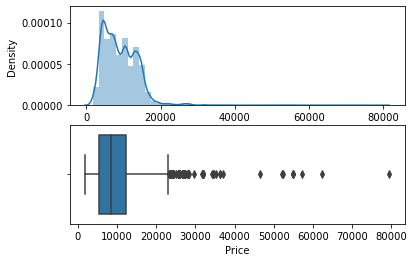

In [74]:
plot(data_train,'Price')

Positively skewed distribution

In [75]:
# considering data point>=40000 is outlier, replace it with median

data_train['Price']=np.where( data_train['Price']>=40000,data_train['Price'].median(), data_train['Price'] )

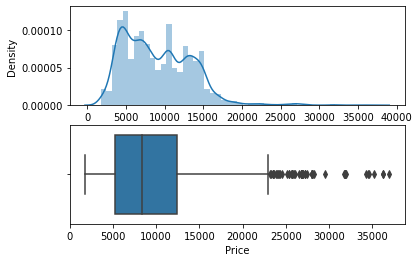

In [76]:
plot(data_train,'Price')

## Seperating independent and dependent features

In [77]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [78]:
X.shape

(10682, 34)

In [79]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

## Feature Selection

In [80]:
mutual_info_classif(X,y)

array([2.11384996, 2.00594879, 2.78570312, 2.29762555, 1.46611888,
       0.70370055, 0.75448604, 0.08540736, 0.67349609, 0.90749782,
       0.        , 0.5914831 , 0.01547119, 0.31672471, 0.        ,
       0.2411462 , 0.        , 0.16919453, 1.52039555, 0.87706644,
       0.31458533, 1.50739943, 0.41079401, 0.28967435, 0.16959978,
       0.37657204, 1.06741409, 0.86366665, 1.44982799, 1.24807046,
       1.85115915, 1.54624639, 1.78046103, 1.07994897])

In [81]:
imp=pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

In [82]:
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
Route_2,2.789510
Route_3,2.312168
Total_Stops,2.129750
Route_1,2.025884
Arrival_Time_hour,1.837813
Duration_hour,1.770151
Delhi,1.583967
Arrival_Time_minute,1.559968
Cochin,1.505270
Route_4,1.464948


In [83]:
imp.columns=['Importance']
imp.sort_values(by="Importance", ascending=False)

,Importance
Route_2,2.789510
Route_3,2.312168
Total_Stops,2.129750
Route_1,2.025884
Arrival_Time_hour,1.837813
Duration_hour,1.770151
Delhi,1.583967
Arrival_Time_minute,1.559968
Cochin,1.505270
Route_4,1.464948


## Applying Random Forest ALgo

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [85]:
def predict(ml_model, dump):
    model=ml_model.fit(X_train,y_train)
    print("Training Score: {}" .format(model.score(X_train, y_train)))
    y_prediction=model.predict(X_test)
    print("Predictions are \n: {} ".format(y_prediction))
    print('\n')
    
    #using business matrix to detect model performance
    #1. R2 Score
    r2_score=metrics.r2_score(y_test,y_prediction)
    print("R2 score is {}" .format(r2_score))
    
    #2. Mean Absolute Error(MAE) 
    print("MAE : ", metrics.mean_absolute_error(y_test, y_prediction))
    
    #3. Mean Square Error(MSE)
    print("MSE : ", metrics.mean_squared_error(y_test, y_prediction))
    
    #4. Root Mean square error(RMSE)
    print("RMSE : ", np.sqrt(  metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test-y_prediction)# returns array of error values in a distribution plot
    #if the plot is normal dist curve, model is good 
    
    
    # dumping the model
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('model.pkl','wb')
        pickle.dump(model,file)

Training Score: 0.9527868012531017
Predictions are 
: [ 3711.303       5885.38       14255.87666667 ...  3877.468
  4015.          4309.5       ] 


R2 score is 0.8230762672791352
MAE :  1141.5703235400927
MSE :  3480906.6018176894
RMSE :  1865.718789586922


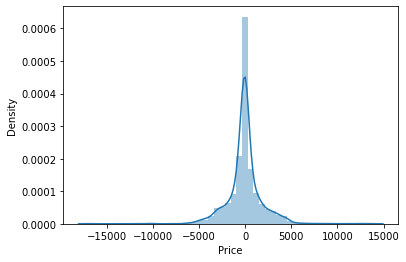

In [86]:
predict(RandomForestRegressor(),1)

## Using multiple reg algos


Training Score: 0.9669848583960075
Predictions are 
: [ 3859.  5228. 13843. ...  3873.  4239.  4107.] 


R2 score is 0.683384677299639
MAE :  1332.4800967087817
MSE :  6229285.071455831
RMSE :  2495.853575724311


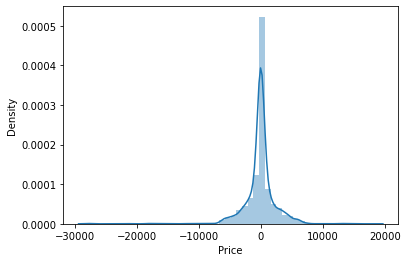

In [87]:
predict(DecisionTreeRegressor(),0)

Training Score: 0.6154101441515578
Predictions are 
: [ 4994.67994504  5431.58551307 12595.61283779 ...  4160.12472169
  2672.73600327  4766.85641918] 


R2 score is 0.6162204772970128
MAE :  1965.5228683585383
MSE :  7550714.953131471
RMSE :  2747.8564287697914


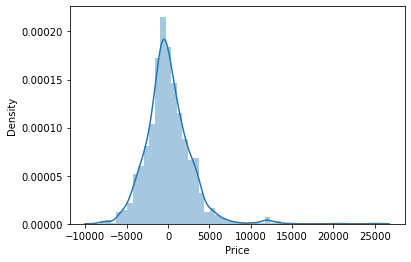

In [88]:
predict(LinearRegression(),0)

Training Score: 0.7806668856874022
Predictions are 
: [ 3627.8  5599.2 13181.2 ...  3860.2  4330.4  4358.4] 


R2 score is 0.6469939740799336
MAE :  1779.8199344875995
MSE :  6945258.203687412
RMSE :  2635.3857789112035


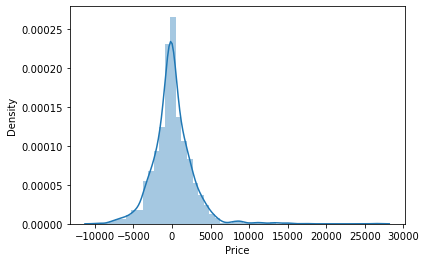

In [89]:
predict(KNeighborsRegressor(),0)
## Low accuracy as the data set was large

# Cross Validate model

    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model

    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [101]:
reg_rf=RandomForestRegressor()

In [103]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [107]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [108]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [109]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [110]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [112]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [113]:
prediction=rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

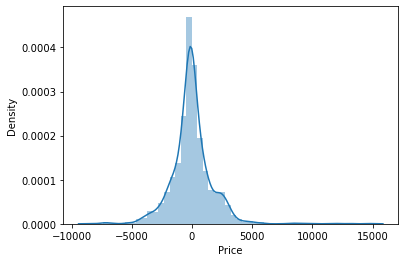

In [114]:
sns.distplot(y_test-prediction)

In [115]:
metrics.r2_score(y_test,prediction)

0.8575397312256627

In [127]:
## Accuracy increased.

3# Terining this model as best model and saving

file=open('rf_random.pkl','wb')
pickle.dump(rf_random,file)

In [128]:
model= open('model.pkl','rb')

In [129]:
forest=pickle.load(model)

In [131]:
prediction2=forest.predict(X_test)
# in case we have some new data pass it to X_test and we get the accuracy

In [132]:
# finding accuracy

metrics.r2_score(y_test,prediction2)

0.8230762672791352